##NEURAL NETWORK WITH SOFTMAX

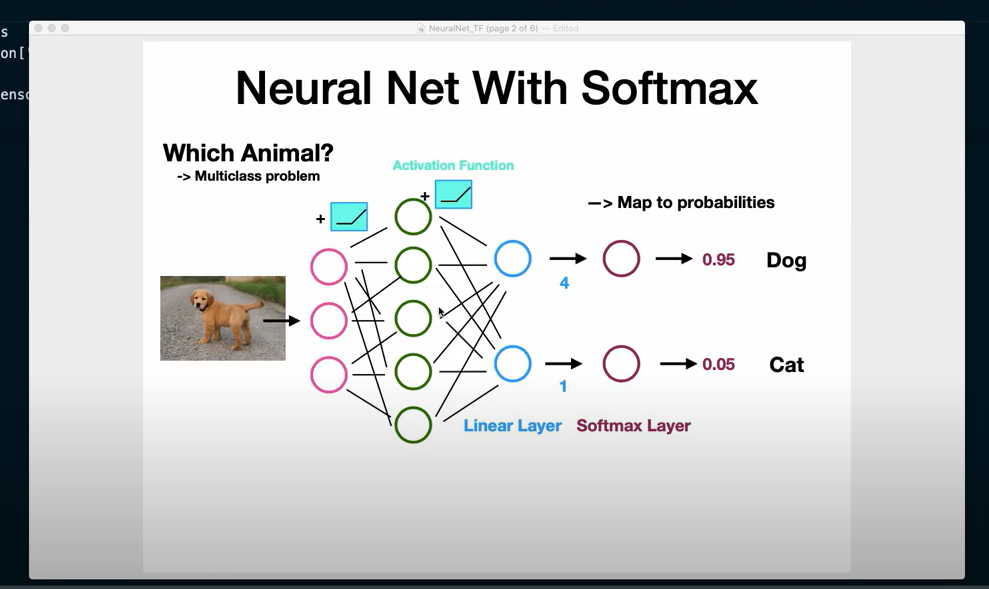


Reference: 

Python Engineer

https://www.youtube.com/watch?v=Edhv7-4t0lc

Sequential API

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist= keras.datasets.mnist


In [ ]:
(x_train, y_train), (x_test,  y_test)= mnist.load_data()
print(x_train.shape, y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


* here x_train, y_train are numpy nd array not tensors
* first normalize the data (the  images have valuesb etween 0 to 255 so to get it between 0 and 1).
0,255-->0,1
* Normalize the data - 
Using The min-max feature scaling
The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. 
Xsc=(X−Xmin)/(Xmax−Xmin)
Xmin = 0, Xmax=255


In [ ]:
x_train, x_test= x_train / 255.0, x_test/255.0

In [ ]:
x_train.shape

(60000, 28, 28)

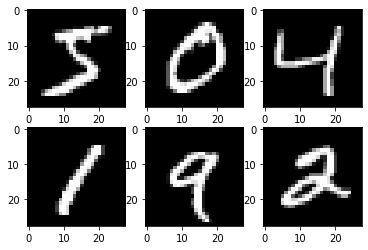

In [ ]:
#plot th data
for i in range(6):
  plt.subplot(2,3,i+1)  # subplot(nrows, ncols, index, **kwargs)
  plt.imshow(x_train[i],cmap='gray')# plt.imshow - Display data as an image, i.e., on a 2D regular raster. plt.imshow(X, cmap=None)
plt.show()

Model -- we use Sequential API

Flatten layer is used to make the multidimensional input one-dimensional, commonly used in the transition from the convolution layer to the full connected layer. 

In [ ]:
model =  keras.models.Sequential([
         keras.layers.Flatten(input_shape=(28,28)),# you don't need to include the input shape here the model can figure out the input when you fit it through the training data later , but you can't get the model summary for now that's why mentioned input shape to know your model
         keras.layers.Dense(128, activation='relu'), # real fully connected layers-128 is hidden output layer 
         keras.layers.Dense(10),# output layer of linear layer- 10 different class and later for each of these classes we need one output which is the softmax layer in  the image prediction
         # for getting the probability as output we need softmax layer, we could include 'keras.layers.Softmax' , but in the tensorflow docs it is not recommended.
         # but instead you should include the softmax layer in your loss function , so let's leave it  for now

])
print(model.summary())

you can also add layers in your model like these , in this way you have advantage of getting model summary after adding each layer to know working of your model

model =  keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28,28)))

model.add(keras.layers.Dense(128, activation='relu'))

model.add( keras.layers.Dense(10))

loss and optimizers- in a multiclass classification problem typically we use the categorical cross-entropy 

y is an integer class label that's why we use Sparse categorical cross entropy
sometimes the y is one hot encoded then we use categorical cross entropy

from_logits=True - because in the above model creation we didn't include the softmax layer so we still have raw logits or raw numbers  

In [ ]:
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim=keras.optimizers.Adam(learning_rate=0.001)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

# training
batch_size = 64
epochs = 5
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)# shuffle should be set true during training, verbose= 0 means no outpuit, verbose =1 means  a progress bar and two means normal logging 



Epoch 1/5
938/938 - 3s - loss: 0.2994 - accuracy: 0.9152 - 3s/epoch - 4ms/step
Epoch 2/5
938/938 - 2s - loss: 0.1366 - accuracy: 0.9599 - 2s/epoch - 3ms/step
Epoch 3/5
938/938 - 2s - loss: 0.0949 - accuracy: 0.9719 - 2s/epoch - 3ms/step
Epoch 4/5
938/938 - 2s - loss: 0.0721 - accuracy: 0.9787 - 2s/epoch - 3ms/step
Epoch 5/5
938/938 - 2s - loss: 0.0563 - accuracy: 0.9833 - 2s/epoch - 3ms/step


the accuracy is 98% so the neural network is already very good for this task

In [ ]:
# evaluate our model
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 0s - loss: 0.0718 - accuracy: 0.9763 - 387ms/epoch - 2ms/step


[0.07176777720451355, 0.9763000011444092]

we have slightly lower accuracy for the test set but it is still very good

now that we trained and evaluated our model , now for predictions we need the softmax  layer to call the probabilities, we didn't added it during model creation but it was automatically added in the loss definition in sparse categorical cross entropy, so we create a new probability model


In [ ]:
#predictions
probability_model=keras.models.Sequential([
      model, # we can pass the original model here so it have all the layers of original model
      keras.layers.Softmax()

])
predictions = probability_model(x_test)
pred0=predictions[0]
print(pred0)
# since we want to choose the class with highest probability we can do this by calling argmax function
label0=np.argmax(pred0)
print(label0)

tf.Tensor(
[2.8480406e-07 5.4990950e-09 3.4533841e-05 2.1790661e-04 1.5804313e-10
 1.5373216e-07 1.0374011e-11 9.9974459e-01 1.3496054e-06 1.2357976e-06], shape=(10,), dtype=float32)
7


another way to do this is 

In [ ]:
# model + softmax sepqarately
predictions=model(x_test) #fit test data to original model first
predictions = tf.nn.softmax(predictions) # then apply softmax
print(pred0)
label0=np.argmax(pred0)
print(label0)
# you will observe that the output is same as we are doing the same thing

tf.Tensor(
[2.8480406e-07 5.4990950e-09 3.4533841e-05 2.1790661e-04 1.5804313e-10
 1.5373216e-07 1.0374011e-11 9.9974459e-01 1.3496054e-06 1.2357976e-06], shape=(10,), dtype=float32)
7


another way is to :

predictions = model.predict(x_test, batch_size=batch_size)

predictions = tf.nn.softmax(predictions) # then apply softmax

print(pred0)

label0=np.argmax(pred0)

print(label0)

 you will observe that the output is same as we are doing the same thing

In [ ]:
pred05s=predictions[0:5]
print(pred05s.shape)
label05s = np.argmax(pred05s,axis=1)
print(label05s)

(5, 10)
[7 2 1 0 4]
